# Importación librerias

In [1]:
import  os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


# Carga de Datos

Cargamos el Csv que hemos preparado para entrenar los modelos, este se encuentra en la carpeta `data/processed`

## Modelo-1

Para este modelo hemos eliminado los valores nulos

In [2]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_DIR = os.path.join(BASE_DIR, "data", "processed")
file_name = "Propensity_clean_v1.csv"  #cambiar si queremosm probar con otras versiones
file_path = os.path.join(DATA_DIR, file_name)

df = pd.read_csv(file_path)

In [3]:
print(" Datos cargados correctamente.")
df.head() 

 Datos cargados correctamente.


,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
0,0,0,0,0,1,0,0,1,1,4,...,1,0,3,1,2892,0,0,2,18,0
1,0,0,0,0,1,0,0,0,1,46,...,1,1,0,0,1376,7187,0,2,53,0
2,0,0,0,0,1,3,0,1,1,29,...,2,0,0,0,1376,0,1,4,21,3
3,0,0,0,0,1,2,0,0,1,31,...,2,1,3,1,2015,7256,1,4,48,5
4,0,0,0,0,1,2,0,0,2,40,...,3,0,0,0,1818,0,1,3,21,3


## Modelo-2

Para este modelo hemos hecho las siguoentes transformaciones
- Cambiar `Genero`,`Estado_Civil` por la moda
- Eliminar nulos `Averia`
- En `Zona_renta` sustuimos los nulos por desconocido y aplicamos label_encoder

In [4]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_DIR = os.path.join(BASE_DIR, "data", "processed")
file_name = "Propensity_clean_v5.csv"  #cambiar si queremosm probar con otras versiones
file_path = os.path.join(DATA_DIR, file_name)

df_5 = pd.read_csv(file_path)

In [5]:
df_5.shape


(58048, 23)

In [6]:
df.shape

(44119, 23)

In [7]:
print(" Datos cargados correctamente.")
df_5.head() 

 Datos cargados correctamente.


,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
0,0,0,0,0,1,0,0,1,1,4,...,3,0,3,1,2892,0,0,2,18,0
1,0,0,0,0,1,0,0,0,1,47,...,3,1,0,0,1376,7187,0,2,53,0
2,0,0,0,0,1,3,0,1,1,30,...,2,0,0,0,1376,0,1,4,21,3
3,0,0,0,0,1,2,0,0,1,32,...,2,1,3,1,2015,7256,1,4,48,5
4,0,0,0,0,1,2,0,0,2,41,...,0,0,0,0,1818,0,1,3,21,3


## Carga Propensity_input.csv

In [8]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
RAW_DATA_DIR = os.path.join(BASE_DIR, "data", "raw")
input_file_path = os.path.join(RAW_DATA_DIR, "Propensity_input.csv")

df_input = pd.read_csv(input_file_path,sep=";")

In [9]:
df_input.head(5)

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Campanna2,Campanna3,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente
0,CLIX1,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,NO,NO,Medio,NO DATA,No,NO,2892,0,1,20
1,CLIX2,A,TIPO1,FUEL 1,Baja,M,Otros,SOLTERO,M,Empresa,...,NO,NO,Alto,SI,Averia leve,NO,2892,17967,1,55
2,CLIX3,A,TIPO1,FUEL 1,Baja,M,Contado,SOLTERO,F,Empresa,...,NO,NO,Medio-Bajo,NO DATA,Averia grave,NO,1376,0,1,18
3,CLIX4,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,NO,NO,Alto,SI,No,NO,2594,6219,1,37
4,CLIX5,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,F,Empresa,...,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,1376,0,1,21


In [10]:
df_input_copy = df_input.copy()

# Entrenamiento Modelos

## Modelo 1

### Selección de Hiperparámetros Óptimos

Se realizó una búsqueda de hiperparámetros evaluando múltiples combinaciones. Se seleccionó el modelo con **mayor F1-score y accuracy**, obteniendo los valores siguientes valores óptimos que usaremos a continuación en el modelo XGboost.  

Esta selección de parámetros se realiza en la sección `xg.ipynb`

Cargamos la tabla con las combinaciones de los posibles paraámetros para posteriormente seleccionar el modelo que consideramos más adecuado

In [11]:
results_path = os.path.join(BASE_DIR, "data", "models_results", "results_v1.csv")
results_df = pd.read_csv(results_path)

In [12]:
results_df.head()

,n_estimators,learning_rate,max_depth,min_child_weight,gamma,subsample,colsample_bytree,lambda,alpha,accuracy,f1_score,recall,roc_auc,cv_score,train_score,overfitting
0,500,0.1,5,3,0.0,0.9,0.7,1,0,0.845422,0.844082,0.845422,0.929815,0.928066,0.903272,OK
1,500,0.1,5,3,0.0,0.9,0.9,1,0,0.844742,0.843427,0.844742,0.929003,0.928069,0.906644,OK
2,500,0.1,8,3,0.0,0.9,0.7,3,0,0.844175,0.843359,0.844175,0.928340,0.927055,0.970024,OK
3,500,0.1,8,5,0.0,0.9,0.9,1,0,0.843268,0.842723,0.843268,0.926911,0.925205,0.971951,OK
4,500,0.1,5,5,0.1,0.9,0.9,1,1,0.843948,0.842604,0.843948,0.928332,0.927896,0.901119,OK


In [13]:
selected_model_1 = results_df.loc[results_df.index ==0]
selected_model_1

,n_estimators,learning_rate,max_depth,min_child_weight,gamma,subsample,colsample_bytree,lambda,alpha,accuracy,f1_score,recall,roc_auc,cv_score,train_score,overfitting
0,500,0.1,5,3,0.0,0.9,0.7,1,0,0.845422,0.844082,0.845422,0.929815,0.928066,0.903272,OK


## Entrenamiento del modelo

In [14]:
df = df.drop(columns=["Tiempo"], errors="ignore")

y = df["Mas_1_coche"]
X = df.drop(columns=["Mas_1_coche"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

select_model_1 = results_df.loc[0]

best_params = {
    'n_estimators': int(select_model_1['n_estimators']),
    'learning_rate': float(select_model_1['learning_rate']),
    'max_depth': int(select_model_1['max_depth']),
    'min_child_weight': int(select_model_1['min_child_weight']),
    'gamma': float(select_model_1['gamma']),
    'subsample': float(select_model_1['subsample']),
    'colsample_bytree': float(select_model_1['colsample_bytree']),
    'reg_lambda': float(select_model_1['lambda']),
    'reg_alpha': float(select_model_1['alpha']),
}

bmodel_1 = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42,
    **best_params
)

bmodel_1.fit(X_train, y_train)

y_pred = bmodel_1.predict(X_test)
y_pred_proba = bmodel_1.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba)


# Evaluación del Modelo


En la sección **resultados**, se evaluará el modelo seleccionado con los distintos archivos CSV ubicados en `data/processed`.  

Estos archivos son el resultado de aplicar diferentes tratamientos a los valores nulos y variables categóricas.


In [15]:
print("\n Resultados Selected_Model1 ")
print(f" Accuracy: {accuracy:.4f}")
print(f" F1 Score: {f1:.4f}")
print(f" Recall: {recall:.4f}")
print(f" Precision: {precision:.4f}")

print(f" ROC-AUC Score: {roc_auc:.4f}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Resultados Selected_Model1 
 Accuracy: 0.8454
 F1 Score: 0.8441
 Recall: 0.8454
 Precision: 0.8436
 ROC-AUC Score: 0.9298

 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      5886
           1       0.79      0.74      0.76      2938

    accuracy                           0.85      8824
   macro avg       0.83      0.82      0.82      8824
weighted avg       0.84      0.85      0.84      8824



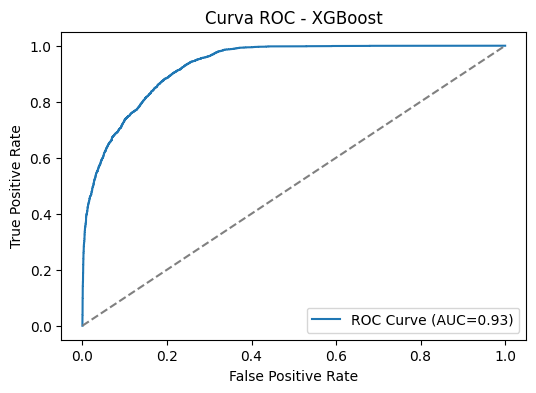

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - XGBoost')
plt.legend()
plt.show()

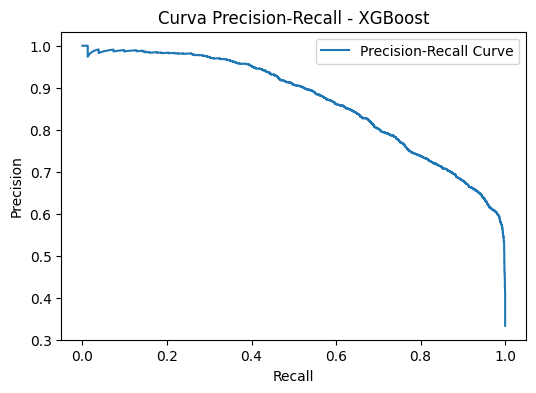

In [17]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - XGBoost')
plt.legend()
plt.show()

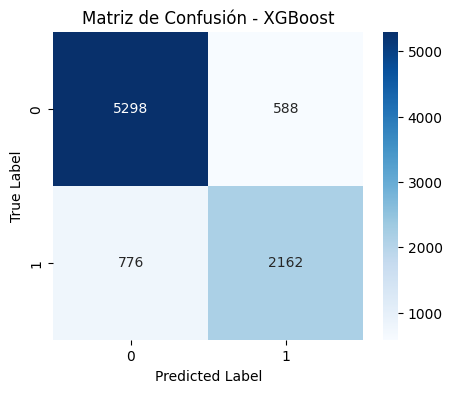

In [18]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión - XGBoost')
plt.show()

## Tranformación Input-1

En esta sección vamos a aplicar a input las mismas transformaciones que los datos que empleamos para entrenar el modelo

In [19]:
df_input_1 = df_input_copy.copy() 

In [20]:
df_input_1.isnull().sum()

CODE                  0
PRODUCTO              0
TIPO_CARROCERIA       0
COMBUSTIBLE           0
Potencia_             0
TRANS                 0
FORMA_PAGO            0
ESTADO_CIVIL        164
GENERO              156
OcupaciOn             0
PROVINCIA             0
Campanna1             0
Campanna2             0
Campanna3             0
Zona _Renta        2607
REV_Garantia          0
Averia_grave          0
QUEJA_CAC             0
COSTE_VENTA           0
km_anno               0
Revisiones            0
Edad Cliente          0
dtype: int64

In [21]:
df_input_1=df_input_1.dropna()

Cambio de los nombres de las columnas que no coinciden

In [22]:
df_input_1 = df_input_1.rename(columns={
    "Potencia_": "Potencia",
    "Zona _Renta": "Zona_Renta",
    "Edad Cliente": "Edad_Cliente"
})

# Eliminar la columna 'CODE' si no es necesaria
if "CODE" in df_input_1.columns:
    df_input_1 = df_input_1.drop(columns=["CODE"])

In [23]:
df_input_1.columns

Index(['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'TRANS',
       'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA',
       'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta', 'REV_Garantia',
       'Averia_grave', 'QUEJA_CAC', 'COSTE_VENTA', 'km_anno', 'Revisiones',
       'Edad_Cliente'],
      dtype='object')

In [24]:
# Label Encoding:
label_cols = ["PRODUCTO", "TIPO_CARROCERIA", "COMBUSTIBLE", "FORMA_PAGO", "ESTADO_CIVIL", 
              "GENERO", "OcupaciOn", "PROVINCIA", "REV_Garantia", "QUEJA_CAC", 
              "Campanna1", "Campanna2", "Campanna3", "TRANS"]  

label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_input_1[col] = le.fit_transform(df_input_1[col])
    label_encoders[col] = le  # Guardamos el encoder por si necesitamos revertirlo

# Confirmar la transformación en algunas columnas
df_input_1[label_cols].head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,REV_Garantia,QUEJA_CAC,Campanna1,Campanna2,Campanna3,TRANS
0,0,0,0,3,0,1,1,26,0,0,1,0,0,1
1,0,0,0,3,3,1,1,38,1,0,1,0,0,1
2,0,0,0,0,3,0,1,46,0,0,0,0,0,1
3,0,0,0,0,0,0,1,47,1,0,0,0,0,1
4,0,0,0,3,0,0,1,8,0,1,1,0,0,1


In [25]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[
    ["Baja", "Media", "Alta"],  # Potencia: 0, 1, 2
    ["No", "Averia leve", "Averia grave", "Averia muy grave"],  # Averia_grave: 0, 1, 2, 3
    ["Otros", "Medio-Bajo", "Medio", "Alto"]  # Zona_Renta: 'Otros' es la peor categoría (0)
])

# Aplicar Ordinal Encoding a 'Potencia', 'Averia_grave' y 'Zona_Renta' en df_clean_v1 y convertir a enteros
df_input_1[["Potencia", "Averia_grave", "Zona_Renta"]] = ordinal_encoder.fit_transform(
    df_input_1[["Potencia", "Averia_grave", "Zona_Renta"]]
).astype(int)

In [26]:
df_input_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8741 entries, 0 to 11483
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   PRODUCTO         8741 non-null   int64
 1   TIPO_CARROCERIA  8741 non-null   int64
 2   COMBUSTIBLE      8741 non-null   int64
 3   Potencia         8741 non-null   int64
 4   TRANS            8741 non-null   int64
 5   FORMA_PAGO       8741 non-null   int64
 6   ESTADO_CIVIL     8741 non-null   int64
 7   GENERO           8741 non-null   int64
 8   OcupaciOn        8741 non-null   int64
 9   PROVINCIA        8741 non-null   int64
 10  Campanna1        8741 non-null   int64
 11  Campanna2        8741 non-null   int64
 12  Campanna3        8741 non-null   int64
 13  Zona_Renta       8741 non-null   int64
 14  REV_Garantia     8741 non-null   int64
 15  Averia_grave     8741 non-null   int64
 16  QUEJA_CAC        8741 non-null   int64
 17  COSTE_VENTA      8741 non-null   int64
 18  km_anno     

## Predict Modelo-1

In [27]:
# Hacer predicciones
y_pred_input = bmodel_1.predict(df_input_1)
y_pred_proba_input = bmodel_1.predict_proba(df_input_1)[:, 1]

In [28]:

df_input_1["Prediccion"] = y_pred_input
df_input_1["Probabilidad"] = y_pred_proba_input

In [29]:
df_input_1.head(5)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Prediccion,Probabilidad
0,0,0,0,0,1,3,0,1,1,26,...,2,0,0,0,2892,0,1,20,1,0.899937
1,0,0,0,0,1,3,3,1,1,38,...,3,1,1,0,2892,17967,1,55,1,0.792456
2,0,0,0,0,1,0,3,0,1,46,...,1,0,2,0,1376,0,1,18,0,0.010609
3,0,0,0,0,1,0,0,0,1,47,...,3,1,0,0,2594,6219,1,37,1,0.608381
4,0,0,0,0,1,3,0,0,1,8,...,1,0,3,1,1376,0,1,21,0,0.057615


In [30]:

PRED_RESULT_DIR = os.path.join(BASE_DIR, "data", "pred_results")
os.makedirs(PRED_RESULT_DIR, exist_ok=True)


output_file_path = os.path.join(PRED_RESULT_DIR, "Propensity_Predictions.csv")

df_input_1.to_csv(output_file_path, index=False)

print(f"Predicciones guardadas en: {output_file_path}")

Predicciones guardadas en: /Users/martinagarciagonzalez/ia_propensity-2/data/pred_results/Propensity_Predictions.csv


# Modelo2

In [ ]:
results_path = os.path.join(BASE_DIR, "data", "models_results", "results_v2.csv")
results_df_2 = pd.read_csv(results_path)

In [ ]:
select_model_2 = results_df_2.loc[0]

In [37]:
select_model_2

n_estimators             500
learning_rate            0.1
max_depth                  8
min_child_weight           3
gamma                    0.3
subsample                0.9
colsample_bytree         0.7
lambda                     1
alpha                      0
accuracy            0.875883
f1_score            0.875045
recall              0.875883
roc_auc             0.949423
cv_score            0.946107
train_score         0.973987
overfitting               OK
Name: 0, dtype: object

## Entrenamiento Modelo-2

In [38]:
df_5.columns

Index(['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'TRANS',
       'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA',
       'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta', 'REV_Garantia',
       'Averia_grave', 'QUEJA_CAC', 'COSTE_VENTA', 'km_anno', 'Mas_1_coche',
       'Revisiones', 'Edad_Cliente', 'Tiempo'],
      dtype='object')

In [40]:
df_5 = df_5.drop(columns=["Tiempo"], errors="ignore")
y = df_5["Mas_1_coche"]
X = df_5.drop(columns=["Mas_1_coche"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


best_params = {
    'n_estimators': int(select_model_2['n_estimators']),
    'learning_rate': float(select_model_2['learning_rate']),
    'max_depth': int(select_model_2['max_depth']),
    'min_child_weight': int(select_model_2['min_child_weight']),
    'gamma': float(select_model_2['gamma']),
    'subsample': float(select_model_2['subsample']),
    'colsample_bytree': float(select_model_2['colsample_bytree']),
    'reg_lambda': float(select_model_2['lambda']),
    'reg_alpha': float(select_model_2['alpha']),
}


bmodel_2 = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42,
    **best_params
)

bmodel_2.fit(X_train, y_train)


y_pred = bmodel_2.predict(X_test)
y_pred_proba = bmodel_2.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba)


cv_scores = cross_val_score(bmodel_2, X_train, y_train, cv=5, scoring="roc_auc", n_jobs=-1)
mean_cv_score = np.mean(cv_scores)


train_score = bmodel_2.score(X_train, y_train)

if train_score > 1.5 * mean_cv_score:
    overfitting_warning = "SEVERE OVERFITTING"
elif train_score > 1.2 * mean_cv_score:
    overfitting_warning = "DANGER"
elif train_score > 1.1 * mean_cv_score:
    overfitting_warning = "MILD OVERFITTING"
else:
    overfitting_warning = "OK"


# Evaluación Modelo

In [41]:
print("\nResultados Selected_Model_2")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"CV Score: {mean_cv_score:.4f}")
print(f"Train Score: {train_score:.4f}")
print(f"Overfitting: {overfitting_warning}\n")


Resultados Selected_Model_2
Accuracy: 0.8759
F1 Score: 0.8750
Recall: 0.8759
ROC-AUC Score: 0.9494
CV Score: 0.9461
Train Score: 0.9740
Overfitting: OK



In [42]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      8222
           1       0.80      0.77      0.78      3388

    accuracy                           0.88     11610
   macro avg       0.85      0.84      0.85     11610
weighted avg       0.87      0.88      0.88     11610



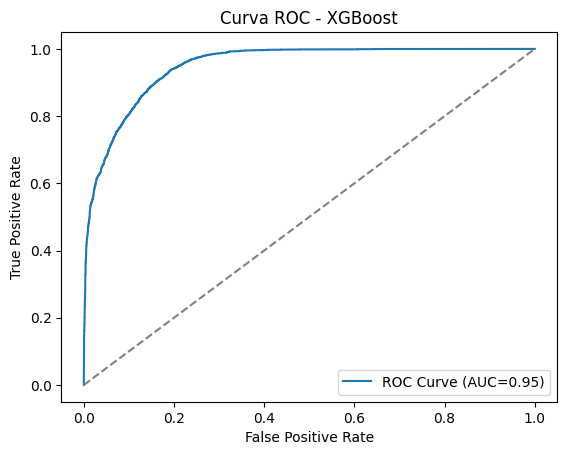

In [43]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - XGBoost')
plt.legend()
plt.show()

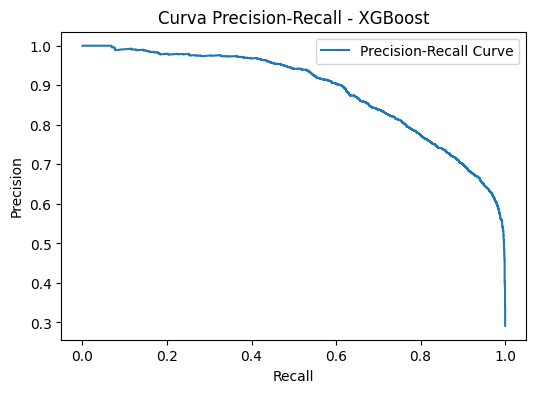

In [49]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - XGBoost')
plt.legend()
plt.show()

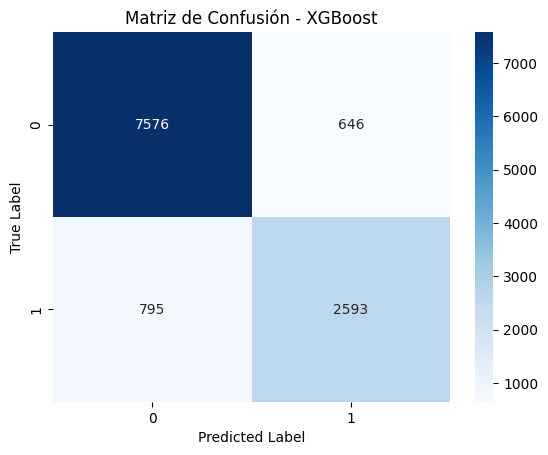

In [44]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión - XGBoost')
plt.show()

## Transformaciones Input-2

In [52]:
df_input_2 = df_input_copy.copy() 

In [53]:
df_input_2.isnull().sum()

CODE                  0
PRODUCTO              0
TIPO_CARROCERIA       0
COMBUSTIBLE           0
Potencia_             0
TRANS                 0
FORMA_PAGO            0
ESTADO_CIVIL        164
GENERO              156
OcupaciOn             0
PROVINCIA             0
Campanna1             0
Campanna2             0
Campanna3             0
Zona _Renta        2607
REV_Garantia          0
Averia_grave          0
QUEJA_CAC             0
COSTE_VENTA           0
km_anno               0
Revisiones            0
Edad Cliente          0
dtype: int64

In [54]:
df_input_2 = df_input_2.rename(columns={
    "Potencia_": "Potencia",
    "Zona _Renta": "Zona_Renta",
    "Edad Cliente": "Edad_Cliente"
})

# Eliminar la columna 'CODE' si no es necesaria
if "CODE" in df_input_2.columns:
    df_input_2 = df_input_2.drop(columns=["CODE"])

In [55]:
#rellenamos los valores zona renta x Desconocido
df_input_2["Zona_Renta"] = df_input_2["Zona_Renta"].fillna("Desconocido")

In [56]:
#sustuimos valores nulos por la moda sin usar inplace=True
df_input_2["ESTADO_CIVIL"] = df_input_2["ESTADO_CIVIL"].fillna(df_input_2["ESTADO_CIVIL"].mode()[0])
df_input_2["GENERO"] = df_input_2["GENERO"].fillna(df_input_2["GENERO"].mode()[0])

In [57]:
#aplicamos label_encoder
label_cols = [
    "PRODUCTO", "TIPO_CARROCERIA", "COMBUSTIBLE", "FORMA_PAGO", "ESTADO_CIVIL", 
    "GENERO", "OcupaciOn", "PROVINCIA", "REV_Garantia", "QUEJA_CAC", 
    "Campanna1", "Campanna2", "Campanna3", "TRANS", "Zona_Renta"
]
label_encoders_v5 = {}  # Diccionario para almacenar los encoders

for col in label_cols:
    le = LabelEncoder()
    df_input_2[col] = le.fit_transform(df_input_2[col])
    label_encoders_v5[col] = le  # Gua

In [58]:
ordinal_encoder = OrdinalEncoder(categories=[
    ["Baja", "Media", "Alta"],  # Potencia: 0, 1, 2
    ["No", "Averia leve", "Averia grave", "Averia muy grave"],  # Averia_grave: 0, 1, 2, 3 
])

df_input_2[["Potencia", "Averia_grave"]] = ordinal_encoder.fit_transform(
    df_input_2[["Potencia", "Averia_grave"]]).astype(int)

## Predict Modelo-2

In [60]:
y_pred_input2 = bmodel_2.predict(df_input_2)
y_pred_proba_input2 = bmodel_2.predict_proba(df_input_2)[:, 1]

In [61]:
df_input_2["Prediccion"] = y_pred_input2
df_input_2["Probabilidad_Compra"] = y_pred_proba_input2

In [63]:
df_input_2

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Prediccion,Probabilidad_Compra
0,0,0,0,0,1,3,0,1,1,26,...,2,0,0,0,2892,0,1,20,1,0.986447
1,0,0,0,0,1,3,3,1,1,38,...,0,1,1,0,2892,17967,1,55,1,0.859687
2,0,0,0,0,1,0,3,0,1,46,...,3,0,2,0,1376,0,1,18,0,0.010904
3,0,0,0,0,1,0,0,0,1,47,...,0,1,0,0,2594,6219,1,37,1,0.529952
4,0,0,0,0,1,3,0,0,1,8,...,3,0,3,1,1376,0,1,21,0,0.060663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11480,4,1,0,1,1,3,0,1,1,38,...,0,1,0,0,2881,5186,6,44,1,0.897569
11481,4,1,0,1,1,0,0,1,1,11,...,3,1,0,0,2881,5167,4,58,0,0.000729
11482,4,1,0,2,1,2,0,1,1,51,...,1,0,0,0,2272,0,0,28,0,0.001813
11483,5,2,0,2,1,0,0,1,1,13,...,3,1,3,1,4081,5970,4,61,0,0.000367


In [62]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
PRED_RESULT_DIR = os.path.join(BASE_DIR, "data", "pred_results")
os.makedirs(PRED_RESULT_DIR, exist_ok=True)

output_file_path = os.path.join(PRED_RESULT_DIR, "Propensity_Predictions_v2.csv")
df_input_2.to_csv(output_file_path, index=False)

print(f" Predicciones guardadas en: {output_file_path}")

✅ Predicciones guardadas en: /Users/martinagarciagonzalez/ia_propensity-2/data/pred_results/Propensity_Predictions_v2.csv


## 📊 Comparación de Modelos - Estrategia de Maximización de Ventas

| Métrica        | Modelo 1 - Eliminando Nulos | Modelo 2 - Imputando Moda y 'Desconocido' |
|---------------------|--------------------------------|---------------------------------------------|
| **Accuracy**       | 0.8454                         | 0.88                                      |
| **Precision (Clase 1 - Compradores)** | 0.79                            | 0.80                                      |
| **Recall (Clase 1 - Compradores)**    | 0.74                            | **0.77** (Mejor)                          |
| **F1-score (Clase 1 - Compradores)**  | 0.76                            | **0.78** (Mejor)                          |
| **ROC-AUC Score**   | 0.9298                          | 0.9494                                        |

## ✅ Conclusión: ¿Cuál es mejor para maximizar ventas?
El **Modelo 2**  es la mejor opción porque tiene **mayor recall (77% vs. 74%)**, lo que significa que **detecta más compradores reales y reduce los falsos negativos**.

 **Si queremos maximizar ventas, priorizamos el modelo con menor cantidad de falsos negativos (FN), y en este caso, el Modelo 2 cumple mejor con este objetivo.** 